# Making a CMD for your Star Cluster

This notebook introduces a few commands that you'll need to make the Color Magnitude Diagram for your star cluster. You can also use the cells below to write code for your unit project.

## .loc[ ] indexing

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("oh_table.csv")
df.head()

,row_id,tgas_source_id,name,ra,dec,parallax,distance,G,J,rave_obs_id,rv,erv,group_id,group_size
0,659,49809491645958528,TYC 1253-388-1,59.457281,18.562195,7.7395,129.949,11.160,9.984,NaN,NaN,NaN,0,151
1,1559,66939848447027584,TYC 1804-1924-1,57.070387,25.214932,7.6087,132.557,9.066,8.137,20120109_0346p23_140,2.95,1.6,0,151
2,1904,50905051903831680,HIP 18091,58.003444,19.596690,6.7611,148.752,10.265,9.267,NaN,NaN,NaN,0,151
3,1929,51452746133437696,HIP 18544,59.507154,20.676596,7.6989,131.839,9.249,8.436,NaN,NaN,NaN,0,151
4,1944,51619115986889472,TYC 1261-1630-1,58.370320,20.907178,7.4847,134.194,11.553,10.096,NaN,NaN,NaN,0,151


In [3]:
# Here we create a sample dataframe
sample_df = pd.DataFrame({"column 1": [20,50,15,50,65,50,10], "column 2": [0,1,1,1,0,0,1]})
sample_df

,column 1,column 2
0,20,0
1,50,1
2,15,1
3,50,1
4,65,0
5,50,0
6,10,1


In [4]:
zeros=sample_df["column 1"].loc[sample_df["column 2"]==0]
zeros

0    20
4    65
5    50
Name: column 1, dtype: int64

In [5]:
sample_df20= sample_df.loc[sample_df["column 1"]<30]
sample_df20

,column 1,column 2
0,20,0
2,15,1
6,10,1


You can use the .loc index method to select all the items in one column which have a particular value in the second column. For example, we may want to select all items from column 1 that have a value of 0 in column 2.

Follow along with the live coding activity to see how this works.

In [6]:
# This code selects all values from column 1 where the value on that same row in column 2 is equal to 0
zeros=sample_df["column 1"].loc[sample_df["column 2"]==0]
zeros

0    20
4    65
5    50
Name: column 1, dtype: int64

Now you try! Select all the values from column 1 where the value on that same row in column 2 is equal to 1.

In [7]:
other_data= sample_df["column 1"].loc[sample_df["column 2"]==1]
other_data

1    50
2    15
3    50
6    10
Name: column 1, dtype: int64

Now select all the values from column 2 where the value on that same row in column 1 is equal to 50.

In [8]:
another_data= sample_df["column 2"].loc[sample_df["column 1"]==50]
another_data

1    1
3    1
5    0
Name: column 2, dtype: int64

#### Note: You can store these selected values in a variable, just like you've done with entire columns!

## Finding absolute magnitude

You will need to convert "G" to absolute magnitude for your CMD.

Look in the dataset for distance. Using G and distance, you can calculate absolute magnitude using the following equation:

absolute magnitude = G - 5 * log(distance) + 5

In [9]:
# You will need to import numpy
import numpy as np

In [10]:
# You can use this function in your code to find the log of distance:
distance=df["distance"]
# np.log10()
abs_mag= df["G"]-5*np.log10(distance)+5
abs_mag.head()
df["Magnitude"]=abs_mag
df.head()

,row_id,tgas_source_id,name,ra,dec,parallax,distance,G,J,rave_obs_id,rv,erv,group_id,group_size,Magnitude
0,659,49809491645958528,TYC 1253-388-1,59.457281,18.562195,7.7395,129.949,11.160,9.984,NaN,NaN,NaN,0,151,5.591135
1,1559,66939848447027584,TYC 1804-1924-1,57.070387,25.214932,7.6087,132.557,9.066,8.137,20120109_0346p23_140,2.95,1.6,0,151,3.453987
2,1904,50905051903831680,HIP 18091,58.003444,19.596690,6.7611,148.752,10.265,9.267,NaN,NaN,NaN,0,151,4.402686
3,1929,51452746133437696,HIP 18544,59.507154,20.676596,7.6989,131.839,9.249,8.436,NaN,NaN,NaN,0,151,3.648780
4,1944,51619115986889472,TYC 1261-1630-1,58.370320,20.907178,7.4847,134.194,11.553,10.096,NaN,NaN,NaN,0,151,5.914335


In [11]:
p_star=df.loc[df["group_id"]==0]
p_star.head()

,row_id,tgas_source_id,name,ra,dec,parallax,distance,G,J,rave_obs_id,rv,erv,group_id,group_size,Magnitude
0,659,49809491645958528,TYC 1253-388-1,59.457281,18.562195,7.7395,129.949,11.160,9.984,NaN,NaN,NaN,0,151,5.591135
1,1559,66939848447027584,TYC 1804-1924-1,57.070387,25.214932,7.6087,132.557,9.066,8.137,20120109_0346p23_140,2.95,1.6,0,151,3.453987
2,1904,50905051903831680,HIP 18091,58.003444,19.596690,6.7611,148.752,10.265,9.267,NaN,NaN,NaN,0,151,4.402686
3,1929,51452746133437696,HIP 18544,59.507154,20.676596,7.6989,131.839,9.249,8.436,NaN,NaN,NaN,0,151,3.648780
4,1944,51619115986889472,TYC 1261-1630-1,58.370320,20.907178,7.4847,134.194,11.553,10.096,NaN,NaN,NaN,0,151,5.914335


In [12]:
import matplotlib.pyplot as plt

In [13]:
SunJ = 3.64
SunG = 5.12
print(SunJ)
print(SunG)
color2=SunG-SunJ
print(color2)

3.64
5.12
1.48


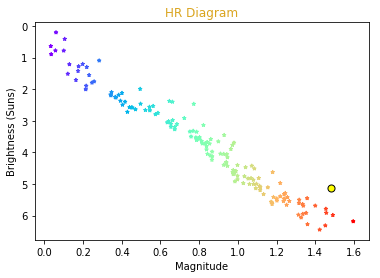

In [14]:
cm = plt.cm.get_cmap("rainbow")
color=p_star["G"]-p_star["J"]
abs_mag_group = p_star["Magnitude"]
plt.scatter(color, abs_mag_group, c=color, s=13,cmap=cm, marker="*") # This plots all our points as a scatterplot
plt.scatter(color2, SunG, s = 50, c = "yellow", edgecolor = "black", marker = "o")

plt.xlabel("Magnitude" ,color = "black")
plt.ylabel("Brightness (Suns)", color = "black")
plt.title("HR Diagram", color = "goldenrod")
plt.gca().invert_yaxis()
plt.show()

### Your first task is to create a Color Magnitude Diagram for your star cluster
You can use as many of the cells below as you need. You can add new cells with the "+" button.

In [15]:
import matplotlib.pyplot as plt

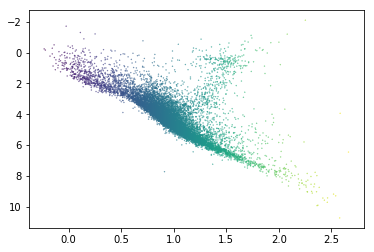

In [16]:
cm = plt.cm.get_cmap("rainbow")
color=df["G"]-df["J"]
plt.scatter(color,df["Magnitude"],s=0.1,c=color)
plt.gca().invert_yaxis()
plt.show()

### Coding Challenge 1: Add the sun to your color magnitude diagram

### Coding Challenge 2: Add a colormap to your diagram

### Coding Challenge 3: Create histograms for the absolute magnitude and color of your star cluster